In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 
from scipy import stats
%matplotlib inline

In [23]:
df=pd.read_csv('/Users/zabihbuda/Desktop/York Universiy files/Data Science /schulich_data_science_1/midterm_data.csv')
df.head()

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4


In [24]:
# Data Cleaning
print(df.shape)
print(df.isnull().sum())


(5000, 10)
userID               0
age                  0
sessions             0
time_spent           0
pages_visited        0
cart_items           0
cart_value           0
checkout_status      0
device             100
location            30
dtype: int64


Since the missing value is less than 10 percent of the data, it is better to be dropped. 

In [25]:
#dropping the missing values
df=df.dropna()
df.shape

(4871, 10)

In [77]:
df.describe()

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status
count,4871.000000,4871.00000,4871.000000,4871.000000,4871.000000,4871.000000,4871.000000,4871.000000
mean,2503.251488,41.53295,5.023609,25.172038,5.777458,14.971258,149.459444,0.273455
std,1445.707937,14.04452,2.589914,9.821864,2.566198,6.054916,68.811486,0.445778
min,1.000000,18.00000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000
25%,1251.500000,29.00000,3.000000,18.298029,4.000000,10.000000,92.415000,0.000000
50%,2505.000000,42.00000,5.000000,25.054759,6.000000,15.000000,143.020000,0.000000
75%,3760.500000,54.00000,7.000000,31.991099,8.000000,20.000000,198.550000,1.000000
max,5000.000000,65.00000,9.000000,90.000000,12.000000,25.000000,427.400000,1.000000


In [79]:
#feature engineerings
df['age_cat']=df['age'].apply(lambda x: 'teenage' if x<18 else 'adult' if 19 < x <30 else 'mid-age' if 30 < x < 50 else 'old')
df['time_spent_cat']=df['time_spent'].apply(lambda x: '1-20' if x<21 else '20-40' if 20 < x <41 else '40-60' if 40 < x < 60 else '60+')
df['pages_visited_cat']=df['pages_visited'].apply(lambda x: '1-3' if x<4 else '4-6' if 3 < x <7 else '7-9' if 7 < x < 10 else '10+')
df['cart_items_cat']=df['cart_items'].apply(lambda x: '5-10' if x<11 else '11-15' if 10 < x <16 else '16-20' if 16 < x < 21 else '20+')
df['cart_values_cat']=df['cart_value'].apply(lambda x: '0-100' if x<101 else '101-200' if 100 < x <201 else '201-300' if 200 < x < 301 else '301-400' if 300 < x < 401 else '400+')


As a first step, I am going to the analyze the data of customers who have checked out or not based on the custoemrs age to see if there is any relationship.

In [80]:
df.head()


,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location,age_cat,time_spent_cat,pages_visited_cat,cart_items_cat,cart_values_cat
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1,old,1-20,1-3,16-20,101-200
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3,old,20-40,1-3,20+,201-300
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4,old,1-20,4-6,20+,201-300
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2,adult,20-40,7-9,20+,101-200
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4,adult,20-40,4-6,5-10,0-100


In [36]:
df['checkout_status'].value_counts()

checkout_status
0    3539
1    1332
Name: count, dtype: int64

In [31]:
df_checkedout.head()

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4
5,6,57,9,36.061679,9,16,195.40,1,Desktop,Location 5
7,8,37,8,28.509460,7,16,118.14,1,Desktop,Location 1
12,13,42,8,37.063535,9,9,88.41,1,Tablet,Location 2


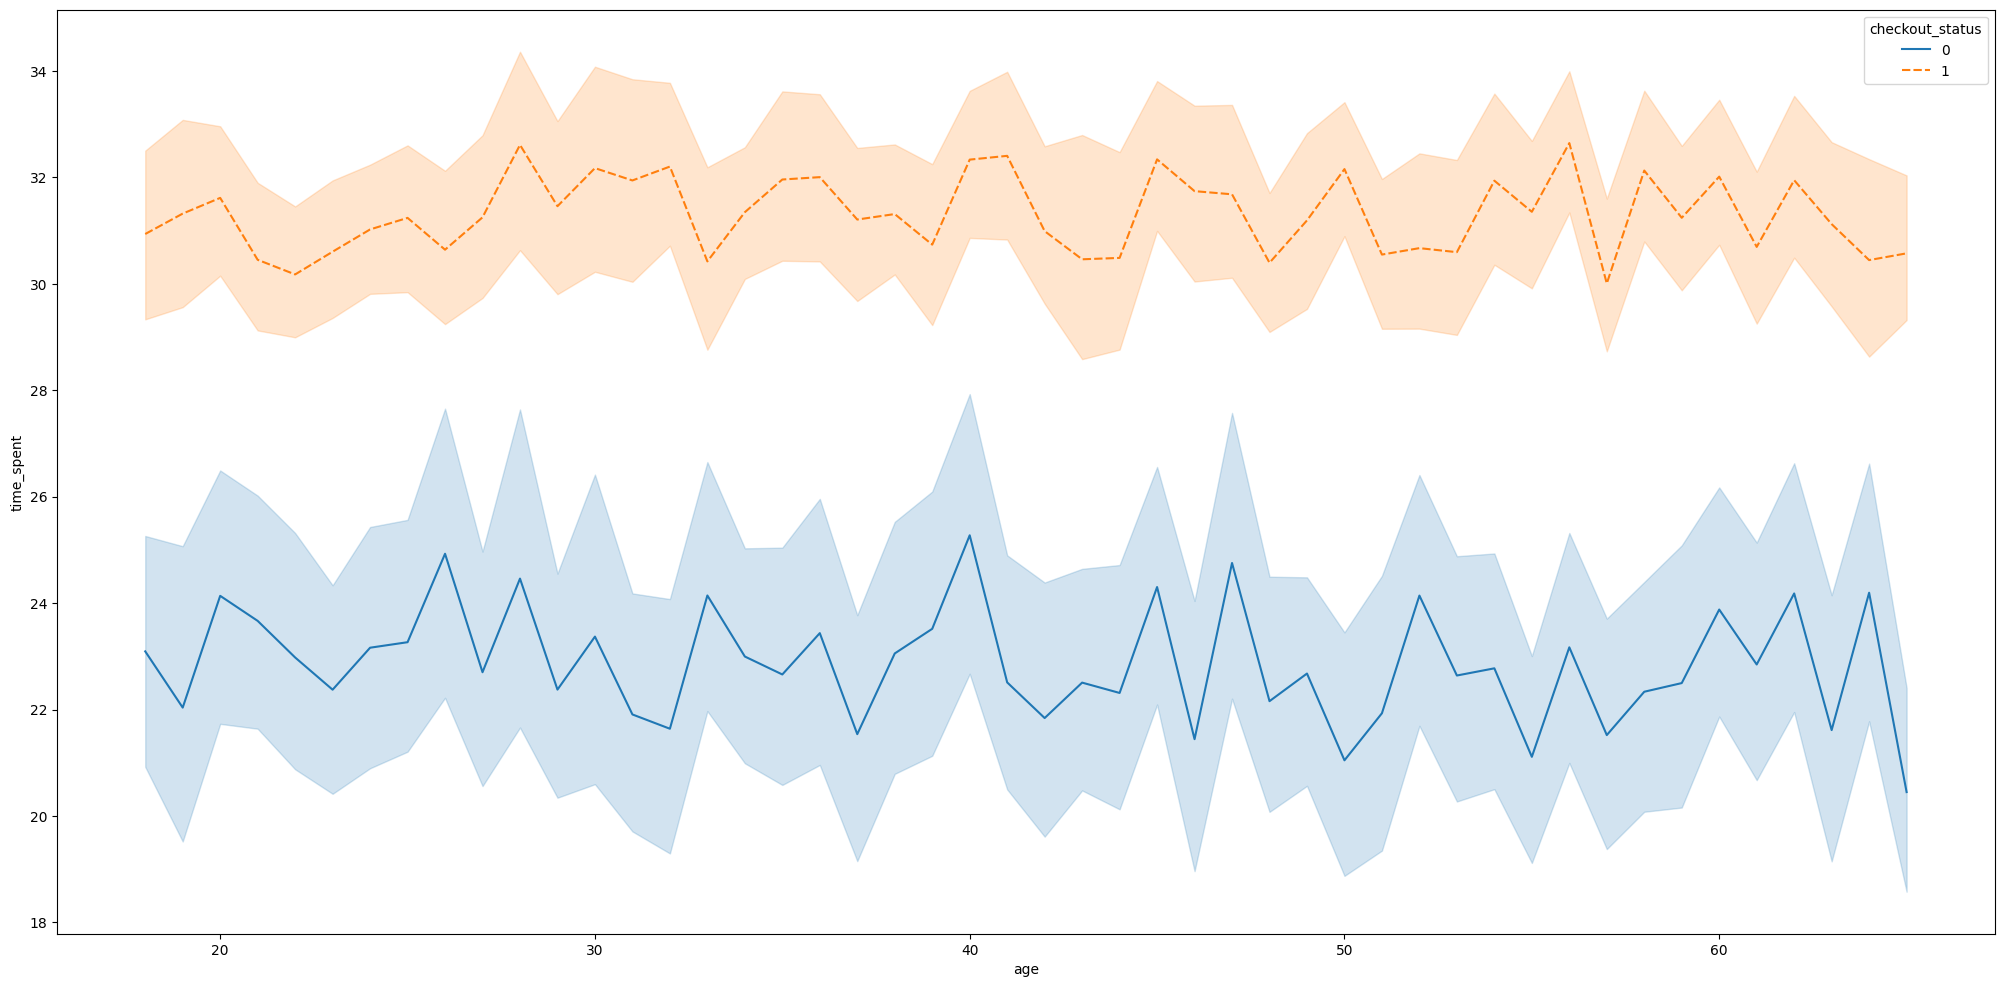

In [40]:
plt.figure(figsize=(25, 12))
sns.lineplot(x=df.age, y=df.time_spent, hue='checkout_status', data=df, style='checkout_status')
plt.show()

In [55]:
df.head()

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4


<Axes: xlabel='location', ylabel='checkout_status'>

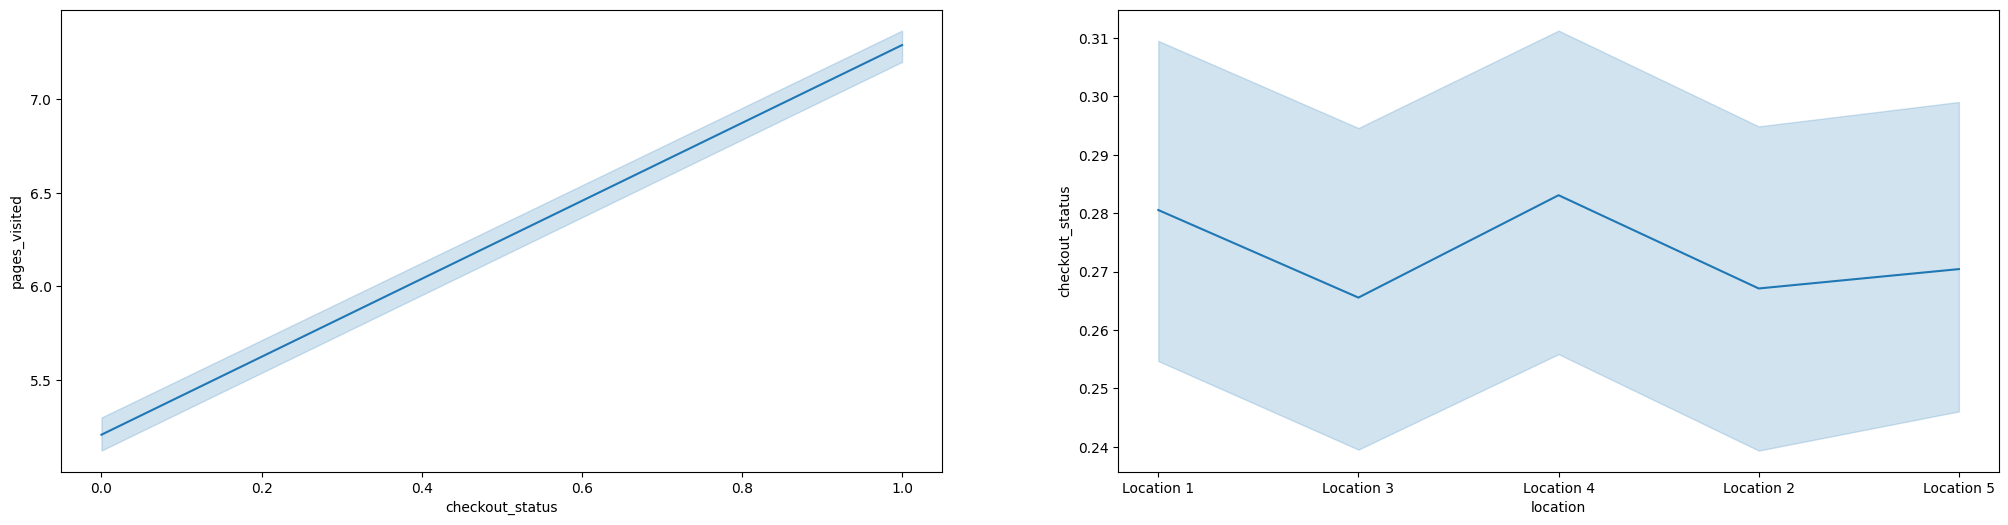

In [62]:
fig, axs=plt.subplots(1, 2, figsize=(25, 6))
sns.lineplot(ax=axs[0], x='checkout_status', y='pages_visited',  data=df)
sns.lineplot(ax=axs[1],y='checkout_status', x='location',  data=df)

The left-side graph shows that higher the number of pages_visted, the customer may have checkout at the end. And the right-sdie graph shows what that location has less impact on whether the customer will checkout or not. However, it still shows that customers in location 1 and 4 have a little bit higher checkouts than the rest.

<Axes: xlabel='device', ylabel='checkout_status'>

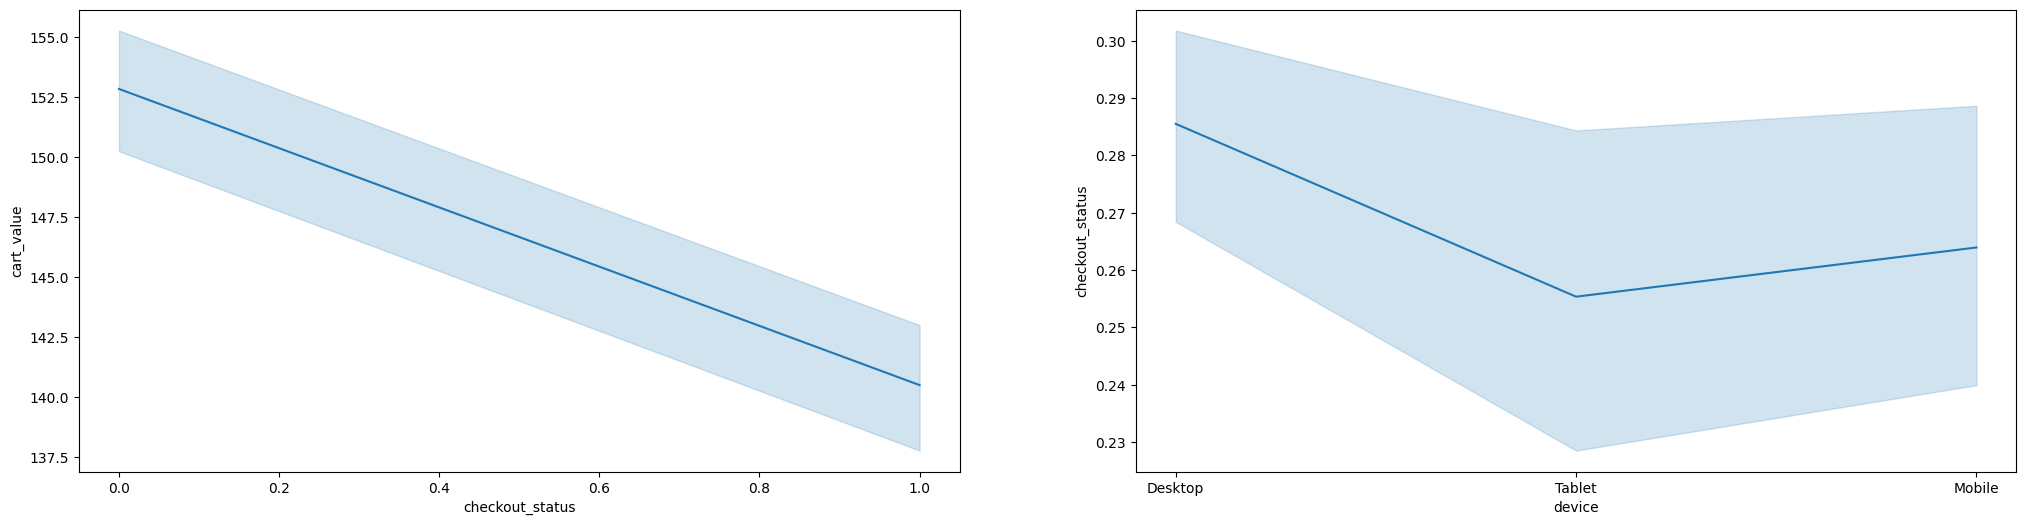

In [61]:
fig, axs=plt.subplots(1, 2, figsize=(25, 6))
sns.lineplot(ax=axs[0], x='checkout_status', y='cart_value',  data=df)
sns.lineplot(ax=axs[1],y='checkout_status', x='device',  data=df)

The left-side graph shows that the lower the cart_value, the higher the probability of checking out by the customer. And the right-side graphs show that custoemrs with desktop may have more check out comparing to the rest of customers with table and mobile device.s

In [63]:
df.head()

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4


<Axes: xlabel='sessions', ylabel='checkout_status'>

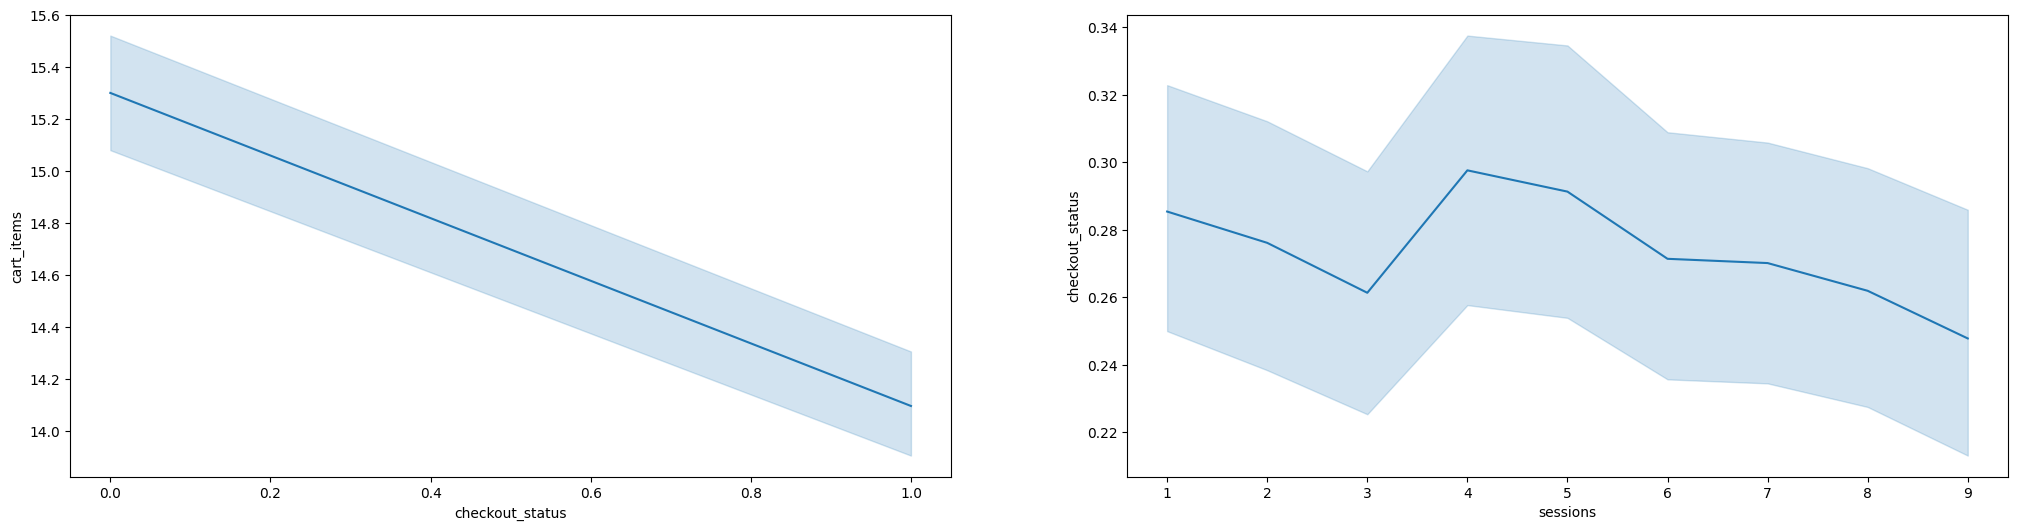

In [65]:
fig, axs=plt.subplots(1, 2, figsize=(25, 6))
sns.lineplot(ax=axs[0], x='checkout_status', y='cart_items',  data=df)
sns.lineplot(ax=axs[1],y='checkout_status', x='sessions',  data=df)

The left-side graphs shows that the lower the number of of car_items, the higher is the chace that the customer will checkout items. And the right-side graphshows that customers in sessions 4 and 5 have higher checkouts than the rest.

In [70]:
# Conducting Anova Test
#Locations

loc_1 = df[df['location'] == 'Location 1']['checkout_status']
loc_2 = df[df['location'] == 'Location 2']['checkout_status']
loc_3 = df[df['location'] == 'Location 3']['checkout_status']
loc_4 = df[df['location'] == 'Location 4']['checkout_status']
loc_5 = df[df['location'] == 'Location 5']['checkout_status']

p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print( p_val)

F_onewayResult(statistic=0.33381290954555437, pvalue=0.7162153055418055)


In [73]:
# Devices
dev_1 = df[df['device'] == 'Desktop']['checkout_status']
dev_2 = df[df['device'] == 'Tablet']['checkout_status']
dev_3 = df[df['device'] == 'Mobile']['checkout_status']
p_val = stats.f_oneway(dev_1, dev_2, dev_3)
print( p_val)

F_onewayResult(statistic=2.0099528432285965, pvalue=0.13410617948275005)


In [76]:
sess_1 = df[df['sessions'] == 1]['checkout_status']
sess_2 = df[df['sessions'] ==2]['checkout_status']
sess_3 = df[df['sessions'] == 3]['checkout_status']
sess_4 = df[df['sessions'] == 4]['checkout_status']
sess_5 = df[df['sessions'] == 5]['checkout_status']
sess_6 = df[df['sessions'] == 6]['checkout_status']
sess_7 = df[df['sessions'] == 7]['checkout_status']
sess_8 = df[df['sessions'] == 8]['checkout_status']
sess_9 = df[df['sessions'] == 9]['checkout_status']


p_val = stats.f_oneway(sess_1, sess_2, sess_3, sess_4, sess_5, sess_6, sess_7, sess_8, sess_9)
print( p_val)

F_onewayResult(statistic=0.6885414927194325, pvalue=0.7020858946233242)


In [85]:
age_cat1 = df[df['age_cat'] == 'old']['checkout_status']
age_cat2 = df[df['age_cat'] =='mid-age']['checkout_status']
age_cat3 = df[df['age_cat'] == 'adult']['checkout_status']
p_val = stats.f_oneway(age_cat2, age_cat1, age_cat3)
print( p_val)

F_onewayResult(statistic=1.7396417807048012, pvalue=0.17569242576487498)


In [87]:
time_spent_cat1 = df[df['time_spent_cat'] == '20-40']['checkout_status']
time_spent_cat2 = df[df['time_spent_cat'] == '1-20']['checkout_status']
time_spent_cat3 = df[df['time_spent_cat'] == '40-60']['checkout_status']
time_spent_cat4 = df[df['time_spent_cat'] == '60+']['checkout_status']
p_val = stats.f_oneway(time_spent_cat1, time_spent_cat2, time_spent_cat3, time_spent_cat4)
print( p_val)

F_onewayResult(statistic=524.9183738731954, pvalue=1.5092286742467596e-295)


<Axes: xlabel='checkout_status', ylabel='time_spent'>

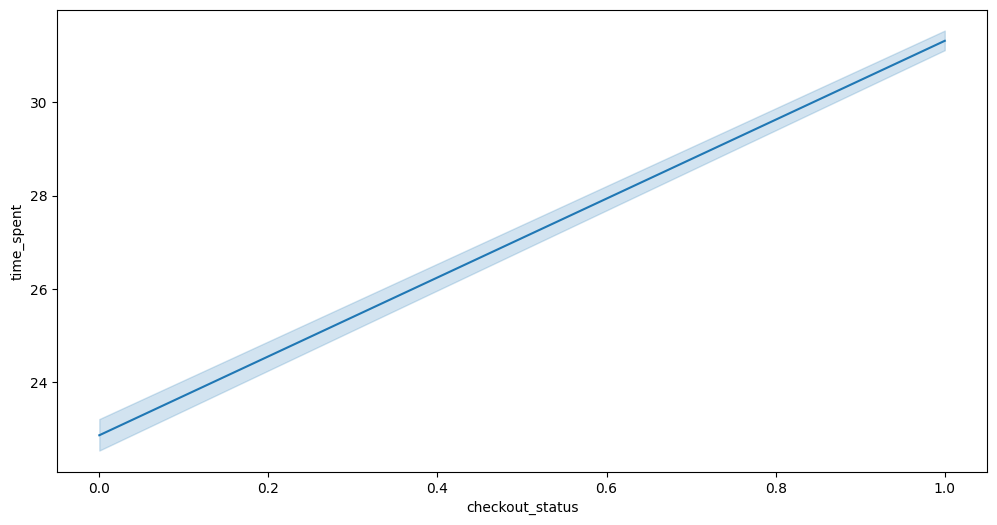

In [95]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='checkout_status', y='time_spent',  data=df)

The p-value of time_spent category shows that there is a significant difference among the category and the graph also shows that the customers who spent more time will check out the times. 

In [89]:
pages_visited_cat1 = df[df['pages_visited_cat'] == '1-3']['checkout_status']
pages_visited_cat1 = df[df['pages_visited_cat'] == '4-6']['checkout_status']
pages_visited_cat1 = df[df['pages_visited_cat'] == '7-9']['checkout_status']
pages_visited_cat1 = df[df['pages_visited_cat'] == '10+']['checkout_status']
p_val = stats.f_oneway(time_spent_cat1, time_spent_cat2, time_spent_cat3, time_spent_cat4)
print( p_val)

F_onewayResult(statistic=524.9183738731954, pvalue=1.5092286742467596e-295)


<Axes: xlabel='checkout_status', ylabel='pages_visited'>

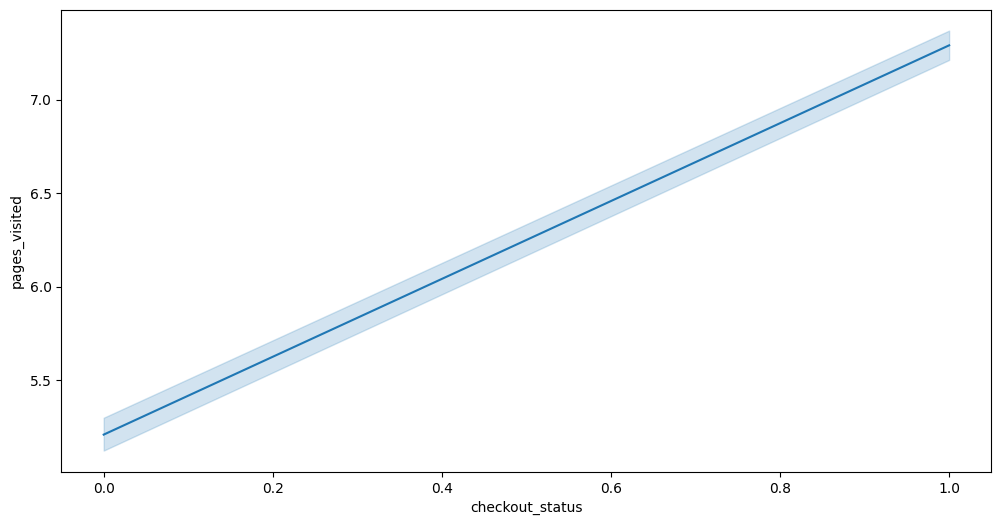

In [94]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='checkout_status', y='pages_visited',  data=df)

The p-value of pages_visted category states that there is a significant difference among the cateogry of number of pages visted and the graph also shows that the lower the number of of pages visted by the customer, the higher is the change the customer will check out. 

In [91]:
cart_items_cat1 = df[df['cart_items_cat'] == '5-10']['checkout_status']
cart_items_cat2 = df[df['cart_items_cat'] == '11-15']['checkout_status']
cart_items_cat3 = df[df['cart_items_cat'] == '16-20']['checkout_status']
cart_items_cat4 = df[df['cart_items_cat'] == '20+']['checkout_status']

p_val = stats.f_oneway(cart_items_cat1, cart_items_cat2, cart_items_cat3, cart_items_cat4)
print( p_val)

F_onewayResult(statistic=226.05730384157292, pvalue=2.6502483424221005e-137)


<Axes: xlabel='checkout_status', ylabel='cart_items'>

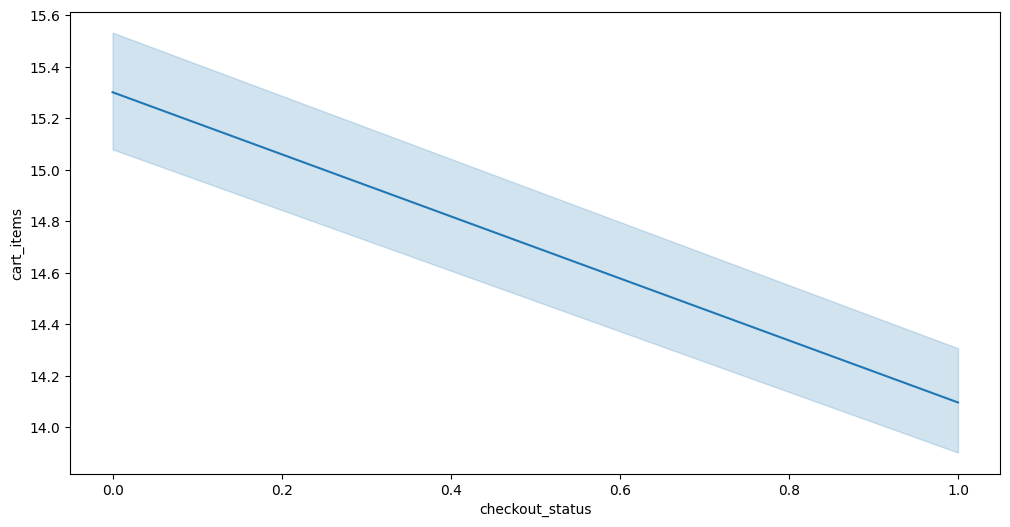

In [96]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='checkout_status', y='cart_items',  data=df)

The p-value of cart_items category shows that there is a singnificant difference among the category and its graph states that the lower the number of items is in the cart, the higher the probibility of checking out by the customer.

In [93]:
cart_values_cat1 = df[df['cart_values_cat'] == '0-100']['checkout_status']
cart_values_cat2 = df[df['cart_values_cat'] == '101-200']['checkout_status']
cart_values_cat3 = df[df['cart_values_cat'] == '201-300']['checkout_status']
cart_values_cat4 = df[df['cart_values_cat'] == '301-400']['checkout_status']
cart_values_cat5 = df[df['cart_values_cat'] == '400+']['checkout_status']

p_val = stats.f_oneway(cart_values_cat1,cart_values_cat2, cart_values_cat3, cart_values_cat4, cart_values_cat5 )
print( p_val)

F_onewayResult(statistic=73.97669604103484, pvalue=5.8912387734638475e-61)


<Axes: xlabel='checkout_status', ylabel='cart_value'>

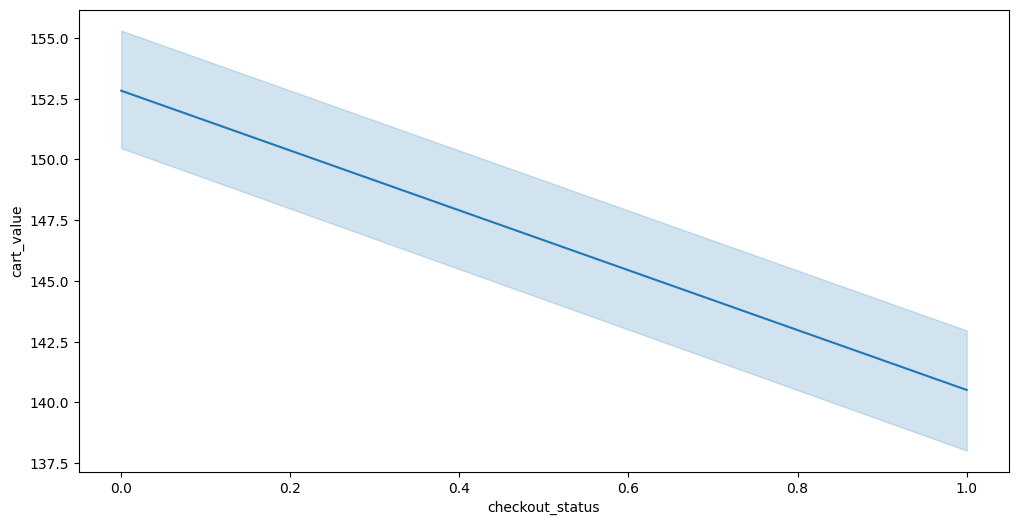

In [98]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='checkout_status', y='cart_value',  data=df)

The p-value of cart_value category shows that there is a significant difference and its graphs also shows that the smaller the value of items in the cart, the higher the probibility of checkout the items. 

1: The analysis shows that customers who visits fewer pages,spent more time on the app, and have fewer items on their carts will purchase and checkout their items from their cart.  

2: The dataset had missing values in 2 columns which was less than 10% of the data. So, it is dropped. To analyze my data properly, I had to conduct feature engineerings to create new features like from age as age category, item category, cart value category, and page visted category. the feature engineering helped find the p-values and their significant difference on check out feature.  

1: Recommendations: team should look for those who have lower number of pages visited, spent more time, and have few items in the cart because they are the one with higher check outs. 